#### `Выполнил: Евсеев Елисей , 16.03.2022`





> # **Домашнее задание №2**.

### **Задача 4**.

Пусть $X_1...X_n$ - независимые одинаково распределенные случайные величины с функцией распределения $F(x)$. 

Обозначим $\tilde{F_n}(x)$ эмпирическую функцию распределения для $X_1...X_n$:

$$\tilde{F_n}(x)=\frac{\#\{i:x_i<x\}}{n}$$

Введем величину $D_n$ (так называемую статистику критерия Колмогорова-Смирнова):

$$D_n=\sqrt{n}\sup_{x}|F(x)-\tilde{F_n}(x)|$$

Продемонстрируйте, что величина $D_n$ имеет предельное распределение при $n \to \infty$.




In [ ]:
from math import sqrt
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
import scipy 

%matplotlib inline

In [ ]:
np.random.seed(42)

Функция, которая считает статистику критерия Колмогорова-Смирнова $D_n$ по заданным функции распределения $F(x)$, эмпирической функции распределения $\tilde{F_n}(x)$ и $n$ (вместо супремума берем максимум, т.к. будем считать, что они аналогичны в данном случае). 

Т.к. выборка порождена некоторым распределением, пусть $F(x)$ - нормальное распределение - $N(0,1)$,  где $\mu=0$, $\sigma=1$.

$$f(x)=\frac{1}{\sigma \sqrt{2\pi}}e^{-\frac{1}{2}(\frac{x-\mu}{\sigma})^2}$$

Сгенерируем выборку размера $n$ из этого распределения с помощью `numpy.random.normal()`.

Воспользуемся библиотечной функцией для расчета эмпирической функции распределения по выборке.

In [ ]:
from statsmodels.distributions.empirical_distribution import ECDF

In [ ]:
def kolmogorov_statistics_criterion(n):
    selection_generated_from_norm = np.random.normal(0.0, 1.0, n)
    empirical_distr_func = ECDF(selection_generated_from_norm)
    normal_distr_func = scipy.stats.norm.cdf(empirical_distr_func.x)
    D_n =  max(abs(normal_distr_func - empirical_distr_func.y)) * sqrt(n)
    return D_n


Каждый раз при вызове функции выше у нас генерируется выборка и считается критерий Колмогорова-Смирнова, давайте сделаем так $k=100$ раз для фиксированного $n$ и построим функцию эмпирического распределения по выборке из $D_{n1}, D_{n2}...D_{nk}$.



In [ ]:
def proof_criterion(n, k=100):
    results_d = []
    for _ in range(k):
        results_d.append(kolmogorov_statistics_criterion(n))
    return np.array(results_d)


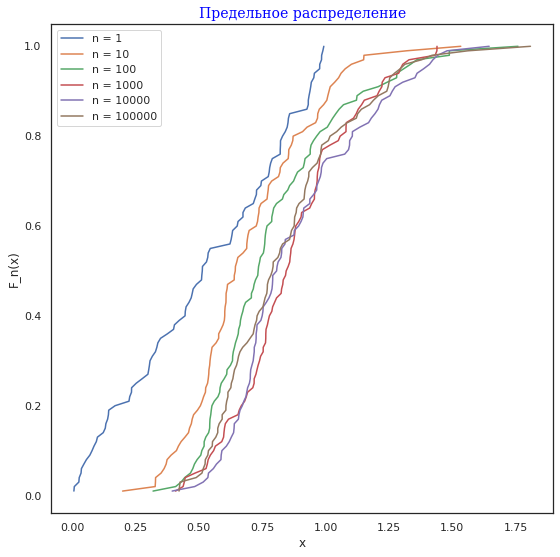

In [ ]:
n_list = [1, 10, 100, 1000, 10000, 100000]
results_x = []
results_y = []

fig = plt.figure(figsize=(9,9))
sns.set_style("white")

for n in n_list:
    results_x.append(ECDF(proof_criterion(n)).x)
    results_y.append(ECDF(proof_criterion(n)).y)
    plt.plot(results_x[-1], results_y[-1], label = f"n = {n}")

plt.xlabel('x')
plt.ylabel('F_n(x)')
plt.legend()
plt.title("Предельное распределение", fontdict = {'family':'serif','color':'blue','size':14})
plt.show()

График функции распределения стандартного нормального распределения $F_n(x)$ выглядит следующим образом:

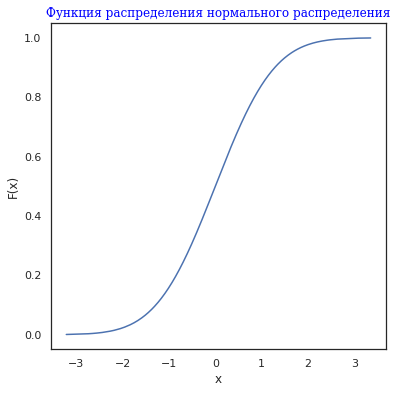

In [ ]:
x = np.random.randn(1000)
y = scipy.stats.norm.cdf(x) 

plt.figure(figsize=(6,6))
plt.title("Функция распределения нормального распределения", fontdict = {'family':'serif','color':'blue','size':12})
plt.xlabel('x')
plt.ylabel('F(x)')
sns.lineplot(x=x, y=y)
plt.show()


Вывод: можем видеть, что графики сходятся к некоторому распределению ($F(x)$ - теоретической функции распределения) при $n \to \infty$, т.к. абсолютная разница между значениями $F_n(x)$ при увеличении $n$ явно уменьшается.

